# 定义和图示 

一个图是一个二元组$ G = (V, E) $ ,其中：
- *V* 是非空有穷的顶点集合。
- *E* 是顶点偶对（称为边）的集合，$E\in V\times V$
- *V* 中的顶点也称为图 *G* 的顶点，*E* 中的边也称为图 *G* 的边 

顶点是图中的基本个体，可以表示任何讨论中需要关心的实体。  
图分：
- 有向图 : 边有方向，是顶点的有序对，用 方括号 $<v_i, v_j>$表示从顶点 $v_i$到顶点$v_j$的有向边，$v_i$为这条边的始点，$v_j$为这条边的终点。在有向图里， $<v_i, v_j>$和 $<v_j, v_i>$是不同的边
- 无序图 ：边没有方向，是顶点的无序对。用圆括号$(v_i, v_j)$表示.

# 图的一些概念和性质

**完全图**  任意两个顶点之间都有边的图（有向图或者无向图）称为完全图  
- n个顶点的无向完全图有 $ \frac{n\times(n-1)}{2}$条边
- n个顶点的有向完全图有 $ n \times (n-1)$ 条边  

应该注意到这么一个事实， $|E| \ge |V|^2 $ , 即 $|E|=O(|V|^2)$ ,边的条数可能达到顶点个数的平方，但也可能更少，在算法的时间和空间复杂性中会用到

度（顶点的度），一个顶点的度就是与它邻接的边的条数，对于有向图，顶点的度还分为入度和出度。  
（顶点数，边数和顶点度数的关系），无论有向图还是无向图，顶点数n，边数e和顶点度数满足如下关系  
$$e = \frac{1}{2}\sum\limits_{i}D(v_i)$$  
这里$D(v_i$表示顶点$v_i$的度数，这里要求对所有顶点的度数求和

路径和相关性质  

路径是图的一个概念，对于图 $G=(V,E)$,如果存在顶点序列 $v_{i_0}, v_{i_1}, \cdots, v_{i_m}$,使得 $(v_{i_0}, v_{i_1}), (v_{i_1},v_{i_2}), \cdots , (v_{i_{m-1}},v_{i_m}) \in E $ (他们都是图的边，对于有向图是$<v_{i_0}, v_{i_1}>, <v_{i_1},v_{i_2}>, \cdots , <v_{i_{m-1}},v_{i_m}> \in E $） 则说从顶点 $v_{i_0}$到$ v_{i_m}$ 存在路径，并称$<v_{i_0}, v_{i_1},  \cdots, v_{i_m}>$是从顶点$v_{i_0}$ 到$ v_{i_m}$ 的一条路径。  
下面是一些与路径相关的概念  
- 路径的长度就是该路径上边的条数
- 回路（环）指的是起点和终点相同的路径
- 如果一个环路除起点和终点外其他路径均不相同，则称为简单回路。
- 简单路径是不包含回路的路径，也就是说，该路径上的顶点除起点和终点可能相同外，其他顶点都不相同，因此简单回路也是简单路径。

有根图  ： 如果在有向图 G 中存在一个顶点v，从顶点v到图G的其他每个顶点都有路径，则称G为有根图，称顶点v为图G的一个根

连通图  ， 如果在无向图G中存在$v_i到v_j$ 的路径，则说 $v_i到v_j$连通

子图  对于 $G=(V,E)$ ,和图$G'=(V',E')$ , 如果 $V' \in V$ 而且 $E'\in E$ ,则称 $G'为G$的一个子图，G也是自身的一个子图  。 一个图可能不是连通的，但它的子图却可能是连通的，称为连通子图

带权图和网络  ，如果图G的每条边都赋予一个权值，则称G为一个带权图。

# 图的表示和实现

## 邻接矩阵

邻接矩阵是表示图中顶点间邻接关系的方针，对于n个顶点的图 $G=(V, E)$, 其邻接矩阵是一个$n\times n$ 的矩阵，图中每个节点（按顺序）对应于矩阵中的一行和一列，矩阵元素表述图中的邻接关系。   
最简单的矩阵是以0/1为元素的方阵，对于图G，其邻接矩阵为  
$$A_{ij}=\left\{\begin{aligned}1 , \ \  &如果顶点v_i到v_j有边 \\0 ,\  \ &如果顶点v_i到v_j无边 \end{aligned}\right.$$
对于带权图，其邻接矩阵的定义为是：  
$$A_{ij}=\left\{\begin{aligned}w(i,j) , \ \  &如果顶点v_i到v_j有边,且权值为w(i,j) \\0或\infty ,\  \ &如果顶点v_i到v_j无边 \end{aligned}\right.$$  

无向图的邻接矩阵是对称矩阵，而有向图的不是，如果无向图要表示连通关系，则要令对角线的元素为1，因为默认各顶点到自身流通，另外有向图的，自身不一定连接到自身啊。所以这时候可以选择0或者$\infty$.

邻接矩阵表示法的缺点  
邻接矩阵经常是很稀疏的，其中有信息的元素比例不大，大量元素都是表示无边的值，比如中国铁路站数大概是6000个，需要6000个顶点，但是绝大多数车站的顶点度数为2，因为他们只与另外2个车站有联系，这个图的边数大概是顶点数的2倍，而用邻接矩阵表示，矩阵大概是$6000^2$个元素，而其中只有大概6000*2个元素有实际信息，绝大多数元素为了说明这个边不存在。为了解决这个问题，人们提出了许多其他的表示法，都可以看作邻接矩阵的压缩版。  
- 邻接表表示法
- 邻接多重表表示法
- 图的十字链表示法

图的邻接表表示  
所谓邻接表，就是为图中每个顶点关联一个边表，其中记录这个顶点的所有邻接边。  
经常用顺序表来表示图中的顶点，每个顶点关联一个表示其邻接边的链表，
![图的邻接表表示](./图的图片/图的邻接表表示.png)

# 图结构的python实现

## 邻接矩阵实现

In [1]:
class Graph():
    """采用邻接矩阵实现的基本图类"""
    def __init__(self, mat, unconn=0):
        """构造函数，mat是一个二维的表，unconn表示两个顶点间没有边的表示"""
        vnum = len(mat) # 有多少行
        for x in mat:  # 检测是否是方阵
            if len(x) != vnum:
                raise ValueError("不是方阵")
        self._mat = [mat[i][:] for i in range(vnum)]  # 用切片的方式实现深拷贝
        self._unconn = unconn
        self._vnum = vnum
    def vertex_num(self):
        """矩阵的高度"""
        return self._vnum
    def _invalid(self, v):
        """检测范围"""
        return v < 0 or v >= self._vnum
    def add_vertex(self):
        """添加，暂不实现"""
        raise ValueError("暂不实现添加顶点")
    def add_edge(self, vi, vj, val=1):
        """添加边"""
        if self._invalid(vi) or self._invalid(vj):
            raise ValueError("范围超了")
        self._mat[vi][vj] = val
    def get_edge(self, vi, vj):
        """取得边的权重值"""
        if self._invalid(vi) or self._invalid(vj):
            raise ValueError("范围超了")
        return self._mat[vi][vj]
    def out_edges(self, vi):
        """取得一个顶点的所有出边"""
        if self._invalid(vi):
            raise ValueError("范围超了")
        return self._out_edges(self._mai[vi], self._unconn)
    @staticmethod
    def _out_edges(row, unconn):
        edges = []
        for i in range(len(row)):
            if row[i] != unconn:  # 判断这个是否是有连接的，
                edges.append((i, row[i]))  # 顶点的v出边都用(v',w)的形式表示，v'表示该边的终点，w表示边的信息（权重）
        return edges
        

## 压缩的邻接矩阵（邻接表）实现

In [15]:
class GraphAL(Graph):
    """图的邻接表实现"""
    def __init__(self, mat=[], unconn=0):
        """构造函数，mat是一个二维的表，unconn表示两个顶点间没有边的表示"""
        vnum = len(mat) # 有多少行
        for x in mat:  # 检测是否是方阵
            if len(x) != vnum:
                raise ValueError("不是方阵")
        self._mat = [Graph._out_edges(mat[i], unconn) for i in range(vnum)]
        self._unconn = unconn
        self._vnum = vnum
    def add_vertex(self):
        """增加一个顶点"""
        self._mat.append([])
        self._vnum += 1
        return self._vnum -1
    def add_edge(self, vi, vj, val=1):
        """添加边"""
        if self._vnum == 0:
            raise ValueError("不能在空表上添加边")
        if self._invalid(vi) or self._invalid(vj):
            raise ValueError("范围超了")
        row = self._mat[vi]
        i = 0
        while i < len(row):
            if row[i][0]  == vj:  # 修改mat[vi][vj]的值，
                self._mat[vi][i] = (vj, val)
                return
            if row[i][0] > vj:  # 原来没有vi到vj的边，退出循环后加入边
                break
            i += 1
        self._mat[vi].insert(i, (vj, val)) 
    
    def get_edge(self, vi,vj):
        """取得2个顶点的边"""
        if self._invalid(vi) or self._invalid(vj):
            raise ValueError("范围超了")
        for i, val in self._mat[vi]:
            if i == vj:
                return val
        return self._unconn
    def out_edges(self, vi):
        """取得某个顶点所有的边"""
        if self._invalid(vi):
            raise ValueError("范围超了")
        return self._mat[vi]
        
    

## 我的邻接矩阵（邻接表）的实现

因为原先的不能保存顶点的信息，我这里做一个保存顶点信息的邻接表。
- 顶点：
   - 保存每个顶点的内容，这里的内容假定是不同的。
- 顶点集：
   - 我用列表来保存所有的顶点，其实就是字符串列表啦。
- 边集：
   - 我用一个列表来保存所有的边，列表内容是一个元组，内容是：(对方顶点的序号，权重)
- 操作： 
   - 顶点数
   - 添加/修改/顶点
   - 添加/修改/删除边
   - 取得一个顶点的所有出边
   - 内部操作函数：
      - 检测顶点取值范围的。

In [58]:
from graphviz import Digraph
class KGraphAL():
    """我自己做的一个图"""
    def __init__(self, vertexs:list=[], unconn=0):
        """这个只是做一个有顶点的的图,vertexs是所有的顶点，至于边，以后慢慢加"""
        self._vertexs = vertexs
        self._vnum = len(self._vertexs)
        self._unconn = unconn
        self._mat = [[] for i in range(self._vnum)]  # 这个是初始边吧。
    def vertex_num(self):
        """顶点数"""
        return self._vnum
    def add_vertex(self, name:str):
        """添加顶点"""
        self._vertexs.append(name)
        self._mat.append(self._unconn)  # 边也要添加。
        self._vnum += 1
    def remove_vertex(self, name:str):
        """删除顶点"""
        raise ValueError("暂不实现吧，太繁琐了")
        # 或者我以后约定这个顶点是空值，就不是删除？
    def alter_vertex(self, old_name:str, new_name:str):
        """修改顶点的名称"""
        i = 0 
        while i < self.vertex_num():
            if self._vertexs[i] == old_name:
                self._vertexs[i] = new_name
                break
    def get_vertex_name(self, vi:int):
        """根据顶点需要取得顶点名字"""
        if self._invalid(vi):
            raise ValueError("范围超了")
        return self._vertexs[vi]
    def get_vertex_index(self, name:str):
        """根据名字取得这个顶点的序号"""
        i = 0
        while i < self._vnum:
            if self._vertexs[i] == name:
                return i
            i = i + 1
        raise ValueError("没有找到这个顶点")
    def _invalid(self, v):
        """检测范围"""
        return v < 0 or v >= self._vnum
    def add_edge(self, vi, vj, val=1):
        """添加边"""
        # 首先判断范围啦
        if self._vnum == 0:
            raise ValueError("不能在空表上添加边")
        # 我这里是要判断顶点表示，是字符串还是数字
        if isinstance(vi, str):
            vi = self.get_vertex_index(vi)
        if isinstance(vj, str):
            vj = self.get_vertex_index(vj)
        # 判断取值范围
        if self._invalid(vi) or self._invalid(vj):
            raise ValueError("范围超了")
        row = self._mat[vi]
        i = 0
        while i < len(row):
            if row[i][0]  == vj:  # 修改mat[vi][vj]的值，
                self._mat[vi][i] = (vj, val)
                return
            if row[i][0] > vj:  # 原来没有vi到vj的边，退出循环后加入边
                break
            i += 1
        self._mat[vi].insert(i, (vj, val))    
    def add_edge_2(self, vi, vj, val=1):
        """添加双向边"""
        # 首先判断范围啦
        if self._vnum == 0:
            raise ValueError("不能在空表上添加边")
        # 我这里是要判断顶点表示，是字符串还是数字
        if isinstance(vi, str):
            vi = self.get_vertex_index(vi)
        if isinstance(vj, str):
            vj = self.get_vertex_index(vj)
        # 判断取值范围
        if self._invalid(vi) or self._invalid(vj):
            raise ValueError("范围超了")
        row = self._mat[vi]
        i = 0
        while i < len(row):
            if row[i][0]  == vj:  # 修改mat[vi][vj]的值，
                self._mat[vi][i] = (vj, val)
                return
            if row[i][0] > vj:  # 原来没有vi到vj的边，退出循环后加入边
                break
            i += 1
        self._mat[vi].insert(i, (vj, val))  
        row = self._mat[vj]
        i = 0
        while i < len(row):
            if row[i][0]  == vi:  # 修改mat[vi][vj]的值，
                self._mat[vj][i] = (vi, val)
                return
            if row[i][0] > vi:  # 原来没有vi到vj的边，退出循环后加入边
                break
            i += 1
        self._mat[vj].insert(i, (vi, val))  
    def get_edge(self, vi,vj):
        """取得2个顶点的边"""
        if self._invalid(vi) or self._invalid(vj):
            raise ValueError("范围超了")
        for i, val in self._mat[vi]:
            if i == vj:
                return val
        return self._unconn
    def out_edges(self, vi):
        """取得某个顶点所有的边"""
        if isinstance(vi, str):
            vi = self.get_vertex_index(vi)
        if self._invalid(vi) :
            raise ValueError("范围超了")
        return self._mat[vi]
    def out_edges2(self,vi):
        """取得某个顶点所有的边，不过返回顶点是字符串格式的"""
        if isinstance(vi, str):
            vi = self.get_vertex_index(vi)
        if self._invalid(vi) :
            raise ValueError("范围超了")
        return [(self.get_vertex_name(i),j) for i, j in self._mat[vi]]
    def show(self):
        """这个是作图啦"""
        g =  Digraph('图片')
        # 我这里干脆遍历边得了
        for i in range(self._vnum):
            # 取得这个顶点的名称，
            vi_str = self.get_vertex_name(i)
            # 遍历这个顶点的其他边
            for vj,w in self._mat[i]:
                vj_str = self.get_vertex_name(vj)
                g.edge(vi_str,vj_str,str(w))
        return g
            
        
    

[('b', 5), ('c', 11), ('d', 5)]

[('a', 5), ('b', 3), ('c', 7), ('g', 20)]

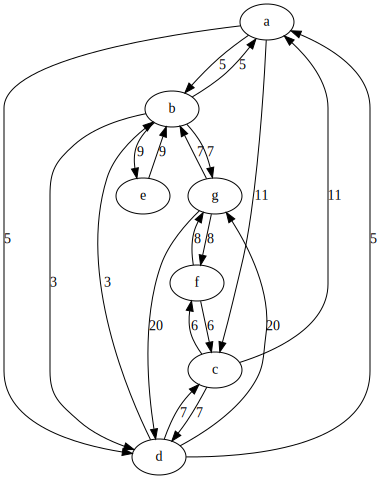

In [59]:
# 我这里先有一个图吧,测试一下我的图吧
graph = KGraphAL(["a", "b", "c", "d", "e", "f", "g"])
graph.add_edge_2("a", "b", 5)
graph.add_edge_2("a", "c", 11)
graph.add_edge_2("c", "f", 6)
graph.add_edge_2("f", "g", 8)
graph.add_edge_2("b", "e", 9)
graph.add_edge_2("b", "g", 7)
graph.add_edge_2("a", "d", 5)
graph.add_edge_2("d", "g", 20)
graph.add_edge_2("c", "d", 7)
graph.add_edge_2("b", "d", 3)
graph.out_edges2("a")
graph.out_edges2("d")
graph.show()

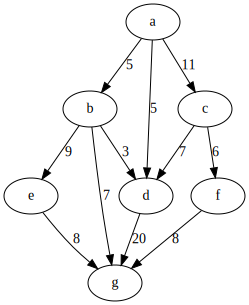

In [62]:
graph = KGraphAL(["a", "b", "c", "d", "e", "f", "g"])
graph.add_edge("a", "b", 5)
graph.add_edge("a", "c", 11)
graph.add_edge("c", "f", 6)
graph.add_edge("f", "g", 8)
graph.add_edge("b", "e", 9)
graph.add_edge("b", "g", 7)
graph.add_edge("a", "d", 5)
graph.add_edge("d", "g", 20)
graph.add_edge("c", "d", 7)
graph.add_edge("b", "d", 3)
graph.add_edge("e", "g", 8)
graph.show()